In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random

In [2]:
def SIR(t,v,R0,recovery_time):
    S,I,G=v    
    return [-R0*S*I/recovery_time,(R0*S-1.)*I/recovery_time,I/recovery_time]

In [3]:
R0=4.    # nombre de reproduction de base
recup=20 # jours
I0=0.001 # pourcentage d'infections initial
Tf=8*recup
sol = solve_ivp(fun=lambda t, y: SIR(t, y, R0,recup),t_span=[0, Tf],y0=[1.-I0,I0,0.],dense_output=True)

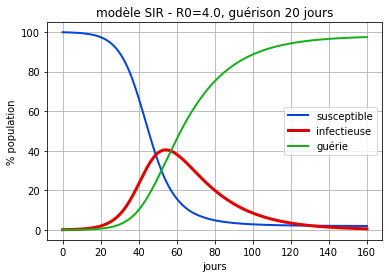

In [5]:
t = np.linspace(0, Tf, 300)
S,I,G = sol.sol(t)

plt.plot(t,S*100,color='xkcd:blue',label="susceptible",lw=2)
plt.plot(t,I*100,color='xkcd:red',label="infectieuse",lw=3)
plt.plot(t,G*100,color='xkcd:green',label="guérie",lw=2)

plt.xlabel('jours')
plt.ylabel('% population')
plt.legend()
plt.title('modèle SIR - R0={}, guérison {} jours'.format(R0,recup))

plt.grid()